In [32]:
from os.path import join
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance

### Plot heatmap based on an interaction matrix by Antton

In [33]:
num_bac_genomes = pd.read_csv(f"NUM_BAC_MULTIPLIED_total_bac_119247_mult_100_thresh_10.0.tsv", sep='\t')
# NUM_BAC_MULTIPLIED_total_bac_25041_mult_21_thresh_10.0
SHIFT = 3 # 1 -- only bac; 3 -- villi + bac
num_bac_genomes.index = num_bac_genomes.index + SHIFT

In [34]:
num_bac_genomes

,genome,count
3,D300423:bin_000011,1933
4,D300423:bin_000014,3867
5,D300431:bin_000017,1839
6,D300432:bin_000002,13431
7,D300433:bin_000005,17529
8,D300433:bin_000009,6967
9,D300442:bin_000011,1361
10,D300444:bin_000010,3152
11,D300444:bin_000011,3429
12,D300446:bin_000001,3023


In [35]:
rename_dict = dict(zip(num_bac_genomes['genome'], num_bac_genomes.index))

In [36]:
genome_distance_matrix = pd.read_csv("genome_functional.distances.txt", sep=" ")

In [37]:
genome_distance_matrix

,D300418:bin_000013,D300418:bin_000017,D300419:bin_000008,D300423:bin_000007,D300423:bin_000011,D300423:bin_000014,D300425:bin_000002,D300428:bin_000005,D300429:bin_000001,D300431:bin_000017,...,TG5_28:bin_000004,TG5_28:bin_000015,TG5_28:bin_000030,TG5_35:bin_000001,TG5_35:bin_000022,TG5_35:bin_000028,TG5:bin_000003,TG5:bin_000041,TG5:bin_000044,TG5:bin_000047
D300418:bin_000013,0.000000,0.180498,0.281896,0.237083,0.270640,0.202061,0.228189,0.274978,0.153106,0.230129,...,0.240765,0.255107,0.208842,0.215178,0.195222,0.178530,0.164847,0.221254,0.238106,0.213876
D300418:bin_000017,0.180498,0.000000,0.240819,0.222820,0.230643,0.211031,0.282187,0.268054,0.227384,0.221373,...,0.254358,0.249247,0.237692,0.258998,0.232534,0.228209,0.212250,0.218006,0.261612,0.202435
D300419:bin_000008,0.281896,0.240819,0.000000,0.356151,0.225554,0.220585,0.239676,0.373584,0.329348,0.257392,...,0.262899,0.250184,0.304917,0.354882,0.274041,0.268930,0.294498,0.322275,0.229998,0.348357
D300423:bin_000007,0.237083,0.222820,0.356151,0.000000,0.247730,0.234579,0.362519,0.148163,0.197224,0.267806,...,0.296933,0.270111,0.216868,0.267312,0.257195,0.269913,0.216728,0.176378,0.291529,0.130821
D300423:bin_000011,0.270640,0.230643,0.225554,0.247730,0.000000,0.224301,0.312457,0.244554,0.314456,0.254414,...,0.318836,0.234332,0.243598,0.340090,0.249868,0.316679,0.284711,0.190680,0.256070,0.281685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TG5_35:bin_000028,0.178530,0.228209,0.268930,0.269913,0.316679,0.206407,0.224353,0.301991,0.194061,0.256055,...,0.291089,0.214221,0.238797,0.235374,0.225352,0.000000,0.240629,0.260434,0.214536,0.230677
TG5:bin_000003,0.164847,0.212250,0.294498,0.216728,0.284711,0.242323,0.256292,0.236682,0.135203,0.248952,...,0.229477,0.268703,0.213182,0.232218,0.202293,0.240629,0.000000,0.213220,0.247249,0.234020
TG5:bin_000041,0.221254,0.218006,0.322275,0.176378,0.190680,0.220102,0.322658,0.214178,0.200837,0.256791,...,0.340425,0.227012,0.198101,0.271295,0.220125,0.260434,0.213220,0.000000,0.265948,0.179161
TG5:bin_000044,0.238106,0.261612,0.229998,0.291529,0.256070,0.235470,0.222698,0.336595,0.234372,0.233069,...,0.264434,0.225920,0.237437,0.281678,0.188630,0.214536,0.247249,0.265948,0.000000,0.274347


In [38]:
genome_distance_matrix_selected = genome_distance_matrix.loc[list(num_bac_genomes['genome']), list(num_bac_genomes['genome'])]

In [39]:
genome_distance_matrix_selected

,D300423:bin_000011,D300423:bin_000014,D300431:bin_000017,D300432:bin_000002,D300433:bin_000005,D300433:bin_000009,D300442:bin_000011,D300444:bin_000010,D300444:bin_000011,D300446:bin_000001,...,D300513:bin_000002,D300514:bin_000001,D300514:bin_000005,D300519:bin_000004,D300522:bin_000007,D300525:bin_000012,TG2_35:bin_000003,TG2_35:bin_000021,TG5_21:bin_000003,TG5_21:bin_000004
D300423:bin_000011,0.000000,0.224301,0.254414,0.247078,0.220053,0.209154,0.250312,0.231533,0.249325,0.250310,...,0.244459,0.260908,0.233175,0.249049,0.249110,0.215048,0.202404,0.236447,0.223392,0.278987
D300423:bin_000014,0.224301,0.000000,0.153843,0.273721,0.205369,0.245422,0.246117,0.262410,0.183427,0.166807,...,0.196433,0.211129,0.222761,0.239580,0.231798,0.227166,0.185352,0.228361,0.170905,0.237592
D300431:bin_000017,0.254414,0.153843,0.000000,0.297513,0.251253,0.263541,0.257828,0.252499,0.185060,0.240853,...,0.264344,0.273491,0.234721,0.263446,0.286938,0.271484,0.236828,0.242088,0.222215,0.274933
D300432:bin_000002,0.247078,0.273721,0.297513,0.000000,0.151950,0.157377,0.218759,0.210830,0.272599,0.257003,...,0.176515,0.171769,0.199918,0.206931,0.149989,0.218411,0.199566,0.196503,0.190417,0.213651
D300433:bin_000005,0.220053,0.205369,0.251253,0.151950,0.000000,0.152406,0.190152,0.183495,0.224599,0.242659,...,0.161475,0.116899,0.160779,0.167167,0.148528,0.190837,0.167026,0.194667,0.183321,0.176524
D300433:bin_000009,0.209154,0.245422,0.263541,0.157377,0.152406,0.000000,0.168416,0.130616,0.215601,0.245084,...,0.164412,0.156331,0.172881,0.132133,0.121183,0.168772,0.177877,0.131608,0.144130,0.169884
D300442:bin_000011,0.250312,0.246117,0.257828,0.218759,0.190152,0.168416,0.000000,0.184030,0.229174,0.264331,...,0.197252,0.167019,0.170873,0.136817,0.198149,0.263045,0.217833,0.177225,0.180331,0.147784
D300444:bin_000010,0.231533,0.262410,0.252499,0.210830,0.183495,0.130616,0.184030,0.000000,0.238602,0.219944,...,0.197251,0.159383,0.187977,0.140800,0.166552,0.203069,0.224049,0.130877,0.180219,0.178361
D300444:bin_000011,0.249325,0.183427,0.185060,0.272599,0.224599,0.215601,0.229174,0.238602,0.000000,0.226681,...,0.231189,0.253202,0.224713,0.229901,0.246564,0.247910,0.190289,0.208674,0.224989,0.228135
D300446:bin_000001,0.250310,0.166807,0.240853,0.257003,0.242659,0.245084,0.264331,0.219944,0.226681,0.000000,...,0.196476,0.210662,0.236609,0.230722,0.208397,0.236180,0.228333,0.221488,0.210955,0.253139


In [40]:
### Re-scale coefficients
"""
id_coeff = 0.00013497191736

for elem1 in genome_distance_matrix_selected.index:
    for elem2 in genome_distance_matrix_selected.columns:
        if elem1 == elem2:
            genome_distance_matrix_selected.loc[elem1, elem2] = id_coeff
        else:
            genome_distance_matrix_selected.loc[elem1, elem2] = 1 / genome_distance_matrix_selected.loc[elem1, elem2] / 10e5
"""

'\nid_coeff = 0.00013497191736\n\nfor elem1 in genome_distance_matrix_selected.index:\n    for elem2 in genome_distance_matrix_selected.columns:\n        if elem1 == elem2:\n            genome_distance_matrix_selected.loc[elem1, elem2] = id_coeff\n        else:\n            genome_distance_matrix_selected.loc[elem1, elem2] = 1 / genome_distance_matrix_selected.loc[elem1, elem2] / 10e5\n'

In [41]:
# genome_distance_matrix_selected.head()

In [42]:
genome_distance_matrix_renamed = genome_distance_matrix_selected.copy()
genome_distance_matrix_renamed.index = list(map(lambda x: rename_dict[x], genome_distance_matrix_renamed.index))
genome_distance_matrix_renamed.columns = list(map(lambda x: rename_dict[x], genome_distance_matrix_renamed.columns))

In [43]:
genome_distance_matrix_renamed.head()

,3,4,5,6,7,8,9,10,11,12,...,27,28,29,30,31,32,33,34,35,36
3,0.000000,0.224301,0.254414,0.247078,0.220053,0.209154,0.250312,0.231533,0.249325,0.250310,...,0.244459,0.260908,0.233175,0.249049,0.249110,0.215048,0.202404,0.236447,0.223392,0.278987
4,0.224301,0.000000,0.153843,0.273721,0.205369,0.245422,0.246117,0.262410,0.183427,0.166807,...,0.196433,0.211129,0.222761,0.239580,0.231798,0.227166,0.185352,0.228361,0.170905,0.237592
5,0.254414,0.153843,0.000000,0.297513,0.251253,0.263541,0.257828,0.252499,0.185060,0.240853,...,0.264344,0.273491,0.234721,0.263446,0.286938,0.271484,0.236828,0.242088,0.222215,0.274933
6,0.247078,0.273721,0.297513,0.000000,0.151950,0.157377,0.218759,0.210830,0.272599,0.257003,...,0.176515,0.171769,0.199918,0.206931,0.149989,0.218411,0.199566,0.196503,0.190417,0.213651
7,0.220053,0.205369,0.251253,0.151950,0.000000,0.152406,0.190152,0.183495,0.224599,0.242659,...,0.161475,0.116899,0.160779,0.167167,0.148528,0.190837,0.167026,0.194667,0.183321,0.176524


/var/folders/ns/t4fb57j54qlg7rb7g3jdcx5c0000gn/T/ipykernel_50292/3939360338.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(genome_distance_matrix_selected, method='average')


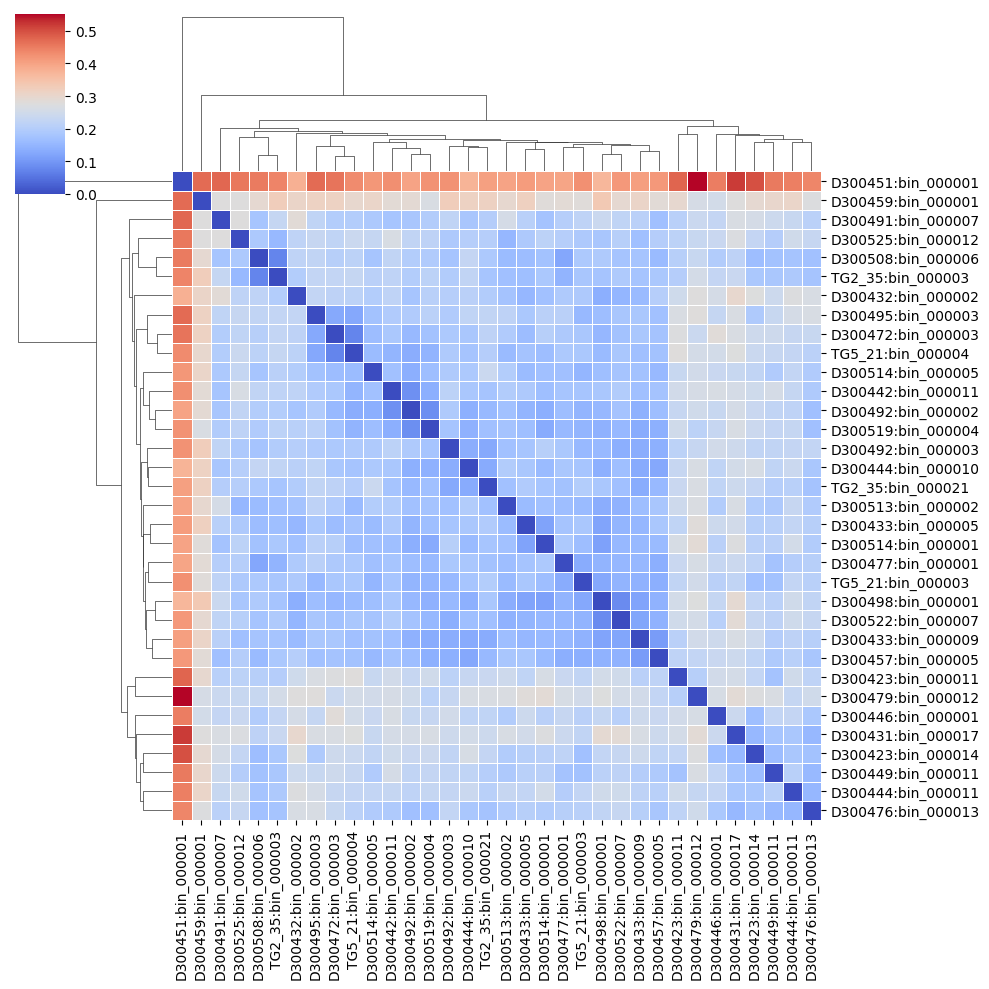

In [44]:
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(genome_distance_matrix_selected, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = genome_distance_matrix_selected.iloc[:, order]

# Create a heatmap with a tree hierarchy
sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10))

plt.savefig("antton_func_sim_34_bac_ORIG_TYPES.png", dpi=300)
plt.show()

/var/folders/ns/t4fb57j54qlg7rb7g3jdcx5c0000gn/T/ipykernel_50292/184109936.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(genome_distance_matrix_renamed, method='average')


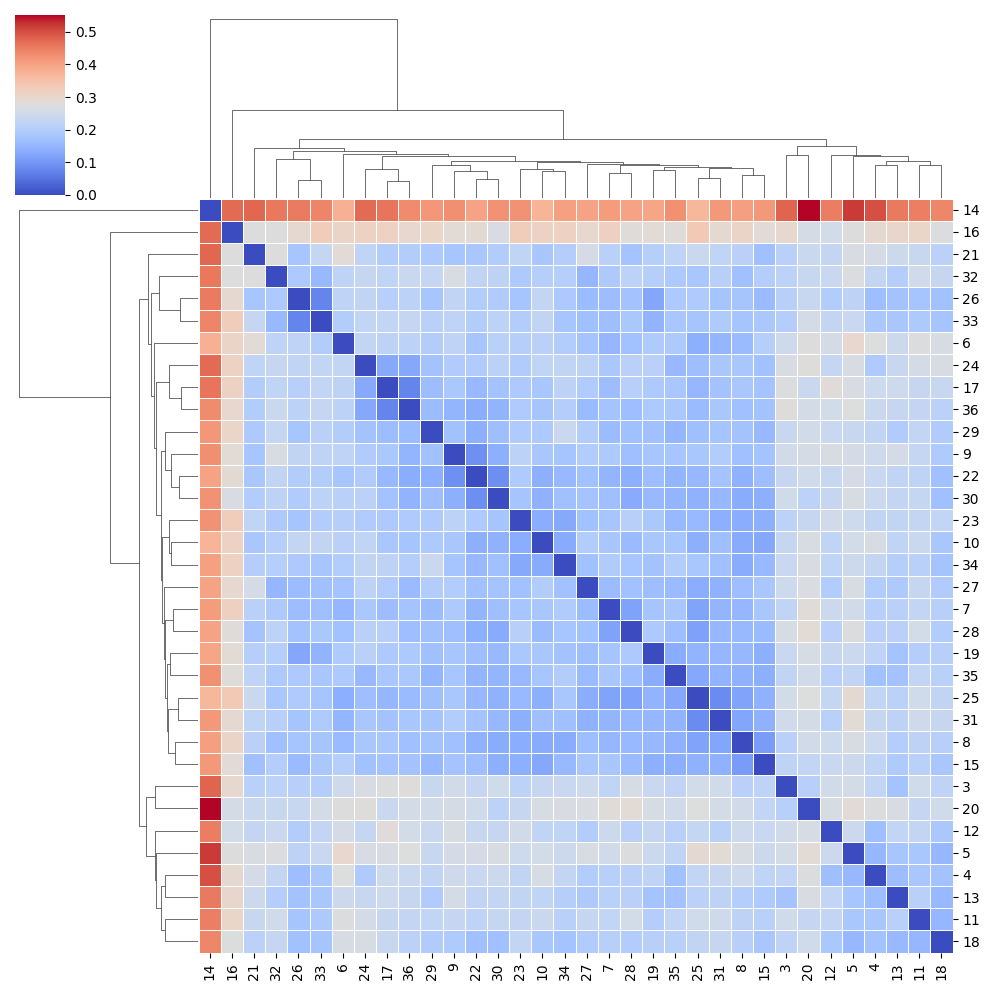

In [45]:
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(genome_distance_matrix_renamed, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = genome_distance_matrix_renamed.iloc[:, order]

# Create a heatmap with a tree hierarchy
sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10))

plt.savefig("antton_func_sim_34_bac_LAMMP_TYPES.png", dpi=300)
plt.show()

* Group 1 (red):
    * D300423:bin_000014 (4)
    * D300431:bin_000017 (5)
    * D300444:bin_000011 (11)
    * D300446:bin_000001 (12)
    * D300449:bin_000011 (13)
    * D300476:bin_000013 (18)
* Group 2 (magenta):
    * D300423:bin_000011 (3)
    * D300479:bin_000012 (20)
* Group 3 (yellow):
    * D300451:bin_000001 (14)
* Group 4 (orange):
    * D300459:bin_000001 (16)
* Group 5 (purple):
    * D300491:bin_000007 (21)
    * D300525:bin_000012 (32)
    * D300508:bin_000006 (26)
    * TG2_35:bin_000003 (33)
* Group 6 (dark green)
    * D300432:bin_000002 (6)
* Group 7 (light green)
    * D300495:bin_000003 (24)
    * D300472:bin_000003 (17)
    * TG5_21:bin_000004 (36)
* Group 8 (grass)
    * 	D300514:bin_000005 (29)
    * 	D300442:bin_000011 (9)
    * 	D300492:bin_000002 (22)
    * 	D300519:bin_000004 (30)
* Group 9 (light blue)
    * D300492:bin_000003 (23)
    * D300444:bin_000010 (10)
    * TG2_35:bin_000021 (34)
* Group 10 (blue)
    * the rest 9 types

### Plot lammps simulation curves

In [97]:
#experiment_folder = "/mnt/scratch/nikolai/3Domics/WALL_LJ_2.5/"
#experiment_folder = "/mnt/scratch/nikolai/3Domics/WALL_HARMONIC_0.5"
#experiment_folder = "/mnt/scratch/nikolai/3Domics/WALL_HARMONIC_0.5_cf0.7_force_100/"
# experiment_folder = "/mnt/scratch/nikolai/3Domics/FINAL_100K_cf0.7_42.5_45.5_bacsize_0.12/"
experiment_folder = "bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5/"
# experiment_folder = "/mnt/scratch/nikolai/3Domics/LAB_MEETING_22_04_24/bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5/"
# experiment_folder = "CLUSTER/exp_0_bind_0_proc_1_v_1_b_2.06_pairwise_2M/"

In [98]:
header = ["Step", "Temp", "PotEng", "KinEng", "TotEng", "Press", "c_Tbacteria", "c_Tvilli", "c_KEbacteria", "c_KEvilli", "c_PEbacteria", "c_PEvilli",  "CPU"]
pattern = re.compile(r'^\s+\d+')

In [99]:
data_file = join(experiment_folder, "log.lammps")
with open(data_file, 'r') as f:
    lammps_logs = f.readlines()

In [100]:
lammps_logs_selected = [x for x in lammps_logs if pattern.match(x)]

In [101]:
len(lammps_logs_selected)

3033

In [102]:
def get_step_rows(x):
    adj_row = [y for y in x.strip("\n").split(' ') if y != '']
    try:
        if int(adj_row[0]) % 1000 == 0 and '.' in adj_row[1] and '.' not in adj_row[0] and len(adj_row) == 13:
            return adj_row
    except:
        pass

In [103]:
lammps_logs_selected = [get_step_rows(x) for x in lammps_logs_selected if get_step_rows(x)]

In [104]:
df_lammps_logs_selected = pd.DataFrame(lammps_logs_selected, columns=header)
df_lammps_logs_selected['Step'] = df_lammps_logs_selected['Step'].astype(int)
df_lammps_logs_selected['Temp'] = df_lammps_logs_selected['Temp'].astype(float)
df_lammps_logs_selected['PotEng'] = df_lammps_logs_selected['PotEng'].astype(float)
df_lammps_logs_selected['KinEng'] = df_lammps_logs_selected['KinEng'].astype(float)
df_lammps_logs_selected['TotEng'] = df_lammps_logs_selected['TotEng'].astype(float)
df_lammps_logs_selected['Press'] = df_lammps_logs_selected['Press'].astype(float)
df_lammps_logs_selected['c_Tbacteria'] = df_lammps_logs_selected['c_Tbacteria'].astype(float)
df_lammps_logs_selected['c_Tvilli'] = df_lammps_logs_selected['c_Tvilli'].astype(float)
df_lammps_logs_selected['c_KEbacteria'] = df_lammps_logs_selected['c_KEbacteria'].astype(float)
df_lammps_logs_selected['c_KEvilli'] = df_lammps_logs_selected['c_KEvilli'].astype(float)
df_lammps_logs_selected['c_PEbacteria'] = df_lammps_logs_selected['c_PEbacteria'].astype(float)
df_lammps_logs_selected['c_PEvilli'] = df_lammps_logs_selected['c_PEvilli'].astype(float)
df_lammps_logs_selected['CPU'] = df_lammps_logs_selected['CPU'].astype(float)

df_lammps_logs_selected.index = list(df_lammps_logs_selected['Step'])

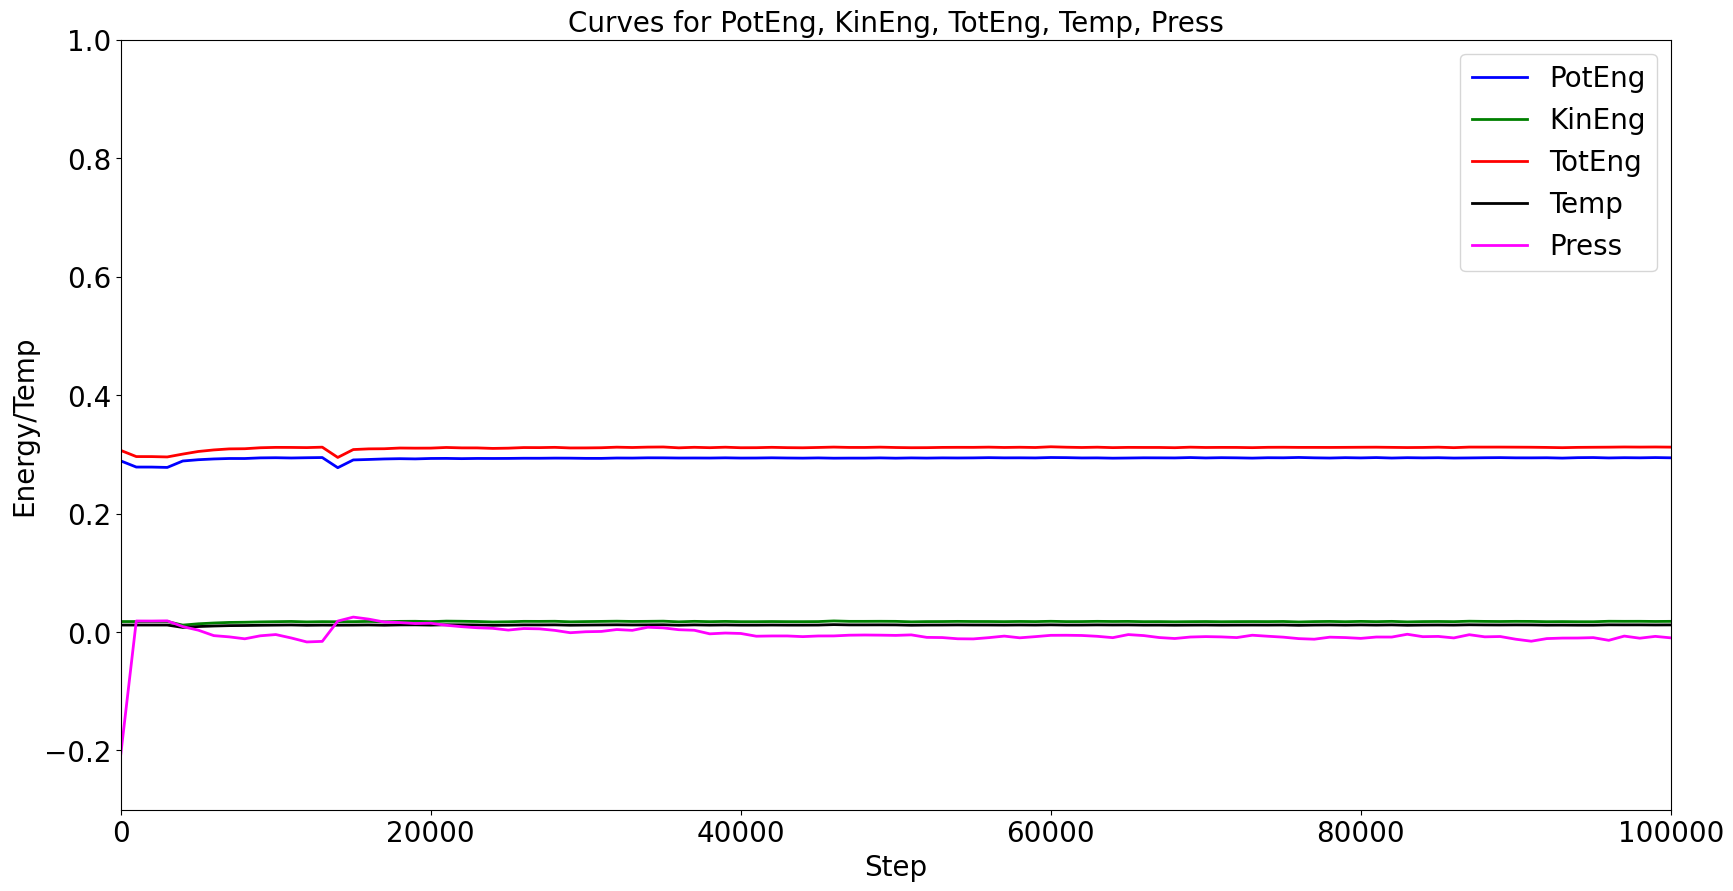

In [105]:
plt.figure(figsize=(20, 10))
# Plot curves for the specified columns
plt.plot(df_lammps_logs_selected['PotEng'], label='PotEng', color='blue', linewidth=2)
plt.plot(df_lammps_logs_selected['KinEng'], label='KinEng', color='green', linewidth=2)
plt.plot(df_lammps_logs_selected['TotEng'], label='TotEng', color='red', linewidth=2)
plt.plot(df_lammps_logs_selected['Temp'], label='Temp', color='black', linewidth=2)
plt.plot(df_lammps_logs_selected['Press'], label='Press', color='magenta', linewidth=2)

# Add labels and legend
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Step', fontsize=20)
plt.ylabel('Energy/Temp', fontsize=20)
plt.title('Curves for PotEng, KinEng, TotEng, Temp, Press', fontsize=20)
plt.ylim((-0.3, 1.0))
plt.xlim((-0.2, 0.01 * 10e6))
plt.legend(fontsize=20)
plt.savefig(f"{experiment_folder}/tot_measurements.png", dpi=300)
# Show the plot
plt.show()

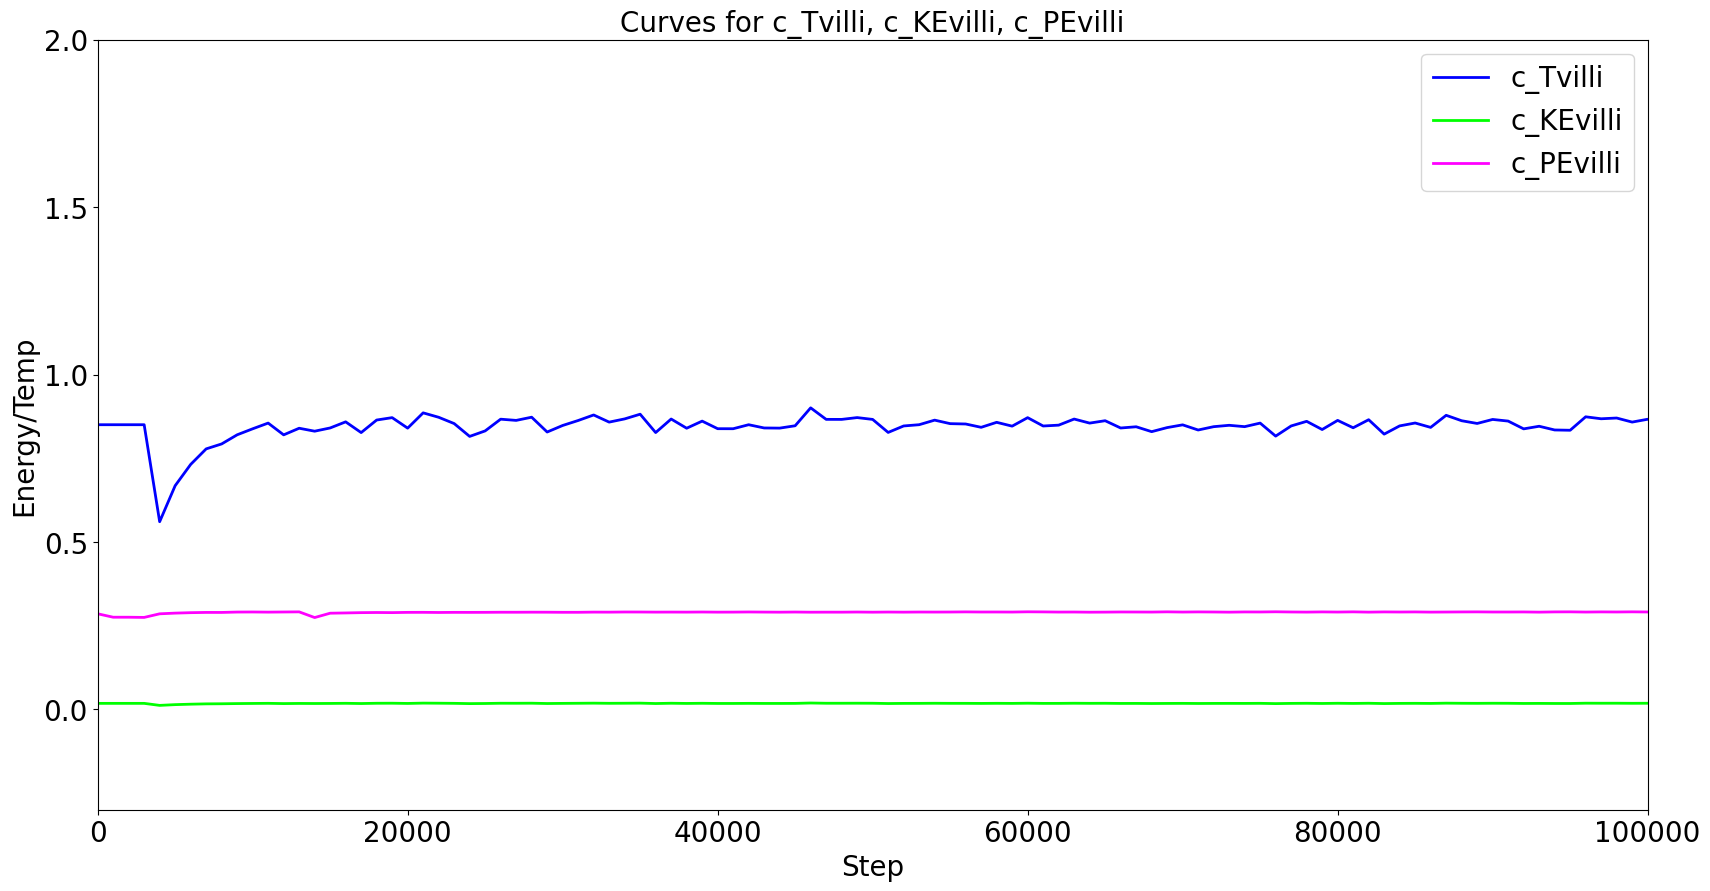

In [106]:
plt.figure(figsize=(20, 10))
# Plot curves for the specified columns
#plt.plot(df_lammps_logs_selected['c_Tbacteria'], label='c_Tbacteria', color='blue')
plt.plot(df_lammps_logs_selected['c_Tvilli'], label='c_Tvilli', color='blue', linewidth=2)
#plt.plot(df_lammps_logs_selected['c_KEbacteria'], label='c_KEbacteria', color='green')
plt.plot(df_lammps_logs_selected['c_KEvilli'], label='c_KEvilli', color='lime', linewidth=2)
#plt.plot(df_lammps_logs_selected['c_PEbacteria'], label='c_PEbacteria', color='red')
plt.plot(df_lammps_logs_selected['c_PEvilli'], label='c_PEvilli', color='magenta', linewidth=2)

# Add labels and legend
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Step', fontsize=20)
plt.ylabel('Energy/Temp', fontsize=20)
plt.title('Curves for c_Tvilli, c_KEvilli, c_PEvilli', fontsize=20)
plt.ylim((-0.3, 2.0))
plt.xlim((-0.2, 0.01 * 10e6))
plt.legend(fontsize=20)
plt.savefig(f"{experiment_folder}/villi_measurements.png", dpi=300)
# Show the plot
plt.show()

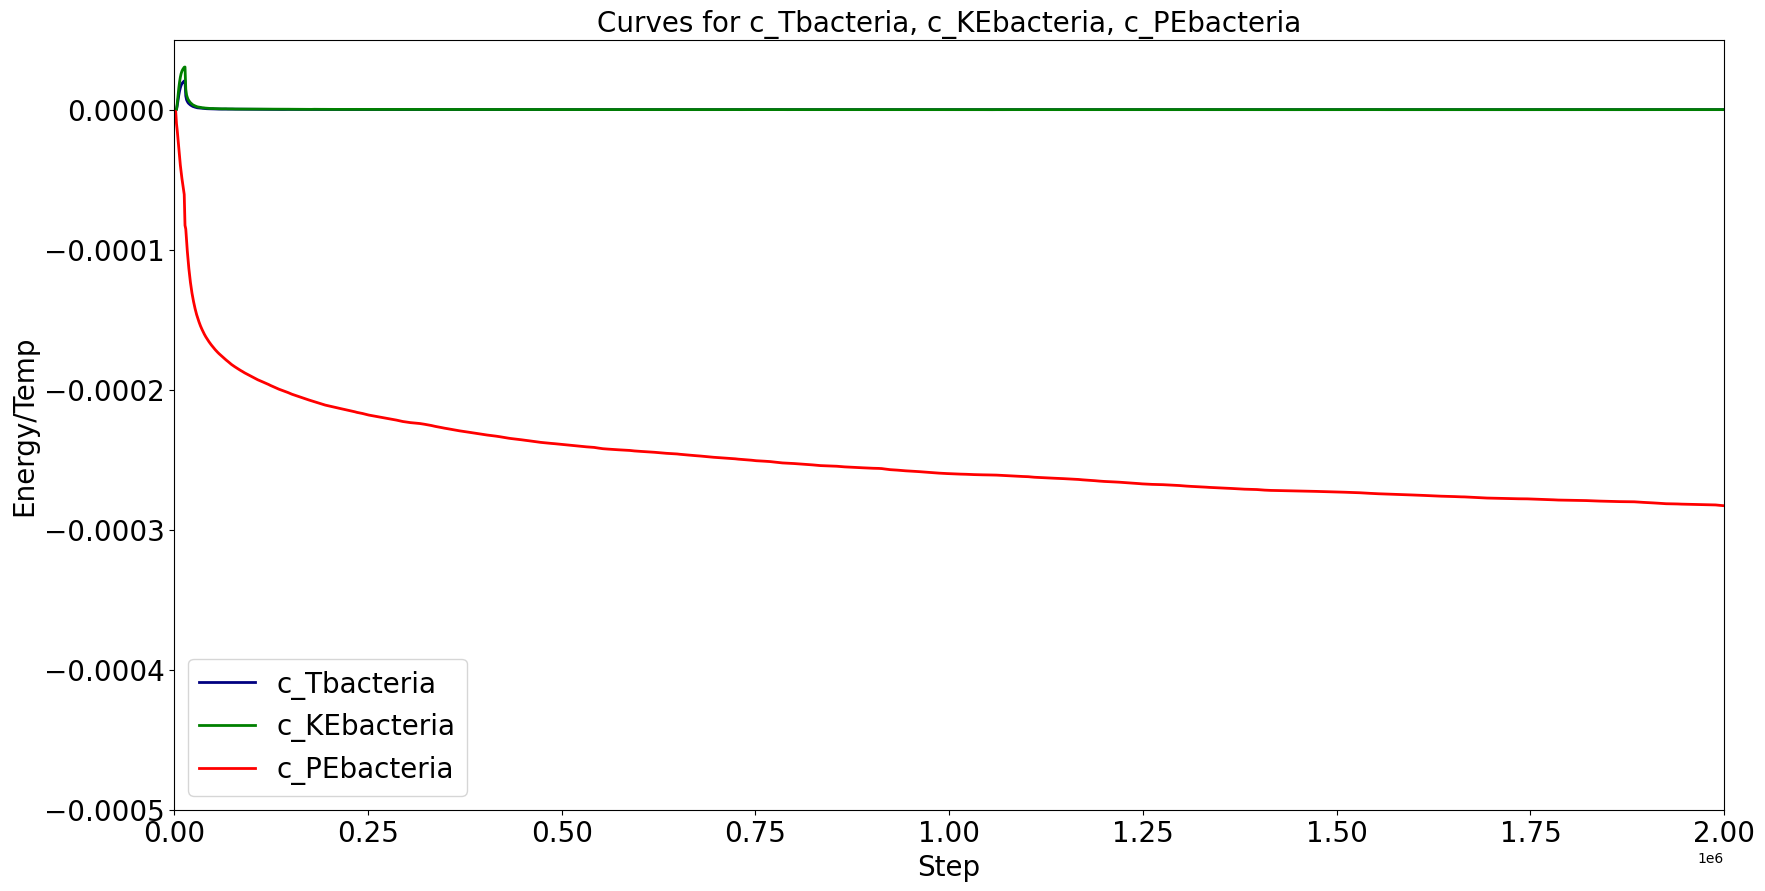

In [107]:
plt.figure(figsize=(20, 10))
# Plot curves for the specified columns
plt.plot(df_lammps_logs_selected['c_Tbacteria'], label='c_Tbacteria', color='navy', linewidth=2)
#plt.plot(df_lammps_logs_selected['c_Tvilli'], label='c_Tvilli', color='cyan')
plt.plot(df_lammps_logs_selected['c_KEbacteria'], label='c_KEbacteria', color='green', linewidth=2)
#plt.plot(df_lammps_logs_selected['c_KEvilli'], label='c_KEvilli', color='lime')
plt.plot(df_lammps_logs_selected['c_PEbacteria'], label='c_PEbacteria', color='red', linewidth=2)
#plt.plot(df_lammps_logs_selected['c_PEvilli'], label='c_PEvilli', color='magenta')

# Add labels and legend
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Step', fontsize=20)
plt.ylabel('Energy/Temp', fontsize=20)
plt.title('Curves for c_Tbacteria, c_KEbacteria, c_PEbacteria', fontsize=20)
plt.ylim((-0.00050, 0.00005))
plt.xlim((-0.2, 0.2 * 10e6))
plt.legend(fontsize=20)
plt.savefig(f"{experiment_folder}/bacteria_measurements.png", dpi=300)
# Show the plot
plt.show()

### Cluster analysis

In [111]:
from glob import glob
from itertools import product
from tqdm import tqdm
import numpy as np

In [112]:
clust_files = sorted(glob(f"{experiment_folder}/clust/*.txt"))

In [110]:
## "new" approach

insilico_heatmap_logodds = pd.DataFrame(0, index=num_bac_genomes.index, columns=num_bac_genomes.index)

for clust_file in clust_files:
    print(clust_file)
    clust_data = pd.read_csv(clust_file, sep='\t', header=None, names=["atom_id", "atom_type", "coords", "cluster"])
    cluster_ids = list(set(clust_data['cluster']))
    no_clust = len(cluster_ids)
    print(f"CLUSTERS: {no_clust}")
    for cluster_id in tqdm(cluster_ids):
        clust_data_i = clust_data[clust_data['cluster'] == cluster_id].copy()
        atom_types_freq = clust_data_i['atom_type'].value_counts()
        atom_types = [int(x) for x in list(set(clust_data_i['atom_type']))]
        atom_types_combinations = list(product(atom_types, repeat=2))
        for comb in atom_types_combinations:
            f_observed = (atom_types_freq.loc[comb[0]] + atom_types_freq.loc[comb[1]]) / atom_types_freq.sum()
            f_expected = (num_bac_genomes.loc[comb[0], 'count'] + num_bac_genomes.loc[comb[1], 'count']) / num_bac_genomes['count'].sum()
            insilico_heatmap_logodds.loc[comb[0], comb[1]] += (f_observed / f_expected / clust_data_i.shape[0])

insilico_heatmap_logodds = insilico_heatmap_logodds / len(clust_files)
insilico_heatmap_logodds = np.log(insilico_heatmap_logodds)


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.50M.txt
CLUSTERS: 2786


  1%|▊                                                                                                                                                                           | 14/2786 [00:02<07:34,  6.11it/s]


KeyboardInterrupt: 

In [113]:
## "old" approach

insilico_heatmap = pd.DataFrame(0, index=num_bac_genomes.index, columns=num_bac_genomes.index)

for clust_file in clust_files:
    print(clust_file)
    clust_data = pd.read_csv(clust_file, sep='\t', header=None, names=["atom_id", "atom_type", "coords", "cluster"])
    cluster_ids = list(set(clust_data['cluster']))
    no_clust = len(cluster_ids)
    print(f"CLUSTERS: {no_clust}")
    for cluster_id in tqdm(cluster_ids):
        atom_types = [int(x) for x in list(set(clust_data[clust_data['cluster'] == cluster_id]['atom_type']))]
        atom_types_combinations = list(product(atom_types, repeat=2))
        for comb in atom_types_combinations:
            insilico_heatmap.loc[comb[0], comb[1]] += 1
    #print(insilico_heatmap)



bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.50M.txt
CLUSTERS: 2786


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2786/2786 [00:26<00:00, 106.05it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.55M.txt
CLUSTERS: 2793


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2793/2793 [00:25<00:00, 109.44it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.60M.txt
CLUSTERS: 2763


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2763/2763 [00:25<00:00, 108.88it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.65M.txt
CLUSTERS: 2730


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2730/2730 [00:25<00:00, 107.67it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.70M.txt
CLUSTERS: 2689


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2689/2689 [00:25<00:00, 106.54it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.75M.txt
CLUSTERS: 2653


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2653/2653 [00:24<00:00, 106.16it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.80M.txt
CLUSTERS: 2637


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2637/2637 [00:24<00:00, 105.87it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.85M.txt
CLUSTERS: 2605


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2605/2605 [00:24<00:00, 105.24it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.90M.txt
CLUSTERS: 2600


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2600/2600 [00:24<00:00, 105.38it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_2.95M.txt
CLUSTERS: 2614


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2614/2614 [00:24<00:00, 106.22it/s]


bacvilli_120K_rnd_42.5_45.5_bacsize_0.12_cf2.5//clust/clust_3.00M.txt
CLUSTERS: 2608


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2608/2608 [00:24<00:00, 106.32it/s]


In [114]:
len(set(clust_data['cluster']))

2608

In [115]:
insilico_heatmap = insilico_heatmap / len(clust_files)

In [116]:
# Create a NumPy array from the original list
outer_product = np.outer(num_bac_genomes['count'], num_bac_genomes['count'])
outer_product = np.sqrt(outer_product)
heatmap_denominator = pd.DataFrame(outer_product, index=num_bac_genomes.index, columns=num_bac_genomes.index)

In [117]:
insilico_heatmap_normalized = insilico_heatmap.copy() / heatmap_denominator.copy()

In [118]:
num_bac_genomes

,genome,count
3,D300423:bin_000011,1933
4,D300423:bin_000014,3867
5,D300431:bin_000017,1839
6,D300432:bin_000002,13431
7,D300433:bin_000005,17529
8,D300433:bin_000009,6967
9,D300442:bin_000011,1361
10,D300444:bin_000010,3152
11,D300444:bin_000011,3429
12,D300446:bin_000001,3023


In [119]:
insilico_heatmap.head()

,3,4,5,6,7,8,9,10,11,12,...,27,28,29,30,31,32,33,34,35,36
3,617.545455,471.454545,401.090909,505.636364,497.000000,480.363636,376.909091,449.818182,456.909091,446.363636,...,397.181818,405.727273,375.818182,454.909091,340.909091,430.000000,501.454545,359.545455,358.909091,416.181818
4,471.454545,761.363636,463.727273,590.272727,587.090909,563.727273,417.272727,512.181818,535.909091,514.090909,...,456.454545,463.363636,428.818182,543.636364,370.272727,488.454545,575.636364,415.272727,417.545455,503.454545
5,401.090909,463.727273,610.909091,503.545455,504.727273,475.818182,357.909091,445.909091,461.000000,448.272727,...,399.727273,402.090909,377.181818,464.272727,339.272727,425.181818,494.454545,368.090909,360.818182,422.272727
6,505.636364,590.272727,503.545455,881.909091,657.727273,626.909091,451.545455,554.636364,578.090909,566.000000,...,491.636364,498.000000,468.454545,593.181818,407.454545,532.000000,628.636364,455.545455,453.545455,537.818182
7,497.000000,587.090909,504.727273,657.727273,871.454545,624.272727,443.454545,555.454545,570.090909,570.090909,...,490.909091,504.818182,461.727273,594.636364,410.090909,524.727273,630.545455,453.545455,445.181818,538.818182


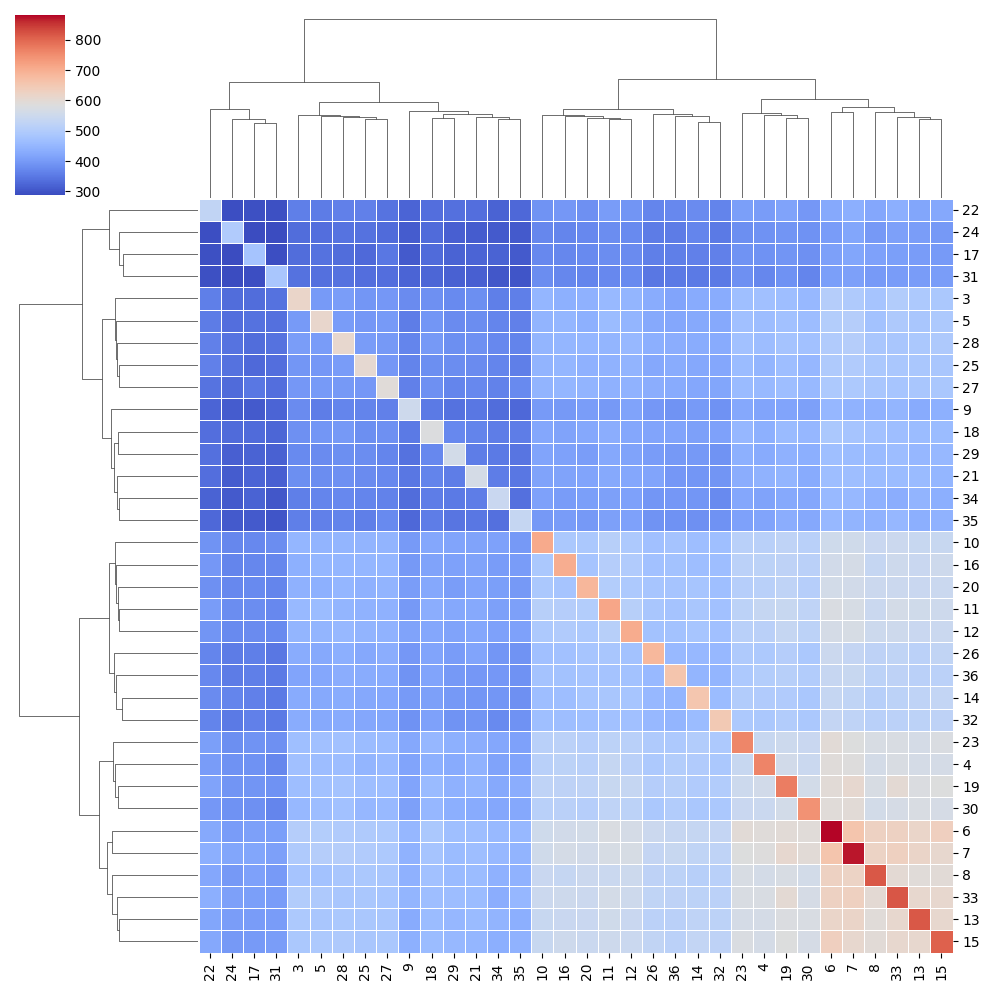

In [120]:
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(insilico_heatmap, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = insilico_heatmap.iloc[:, order]

# Create a heatmap with a tree hierarchy
sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10))

plt.savefig(f"{experiment_folder}/ours_func_sim_34_bac_LAM_TYPES.png", dpi=300)
plt.show()

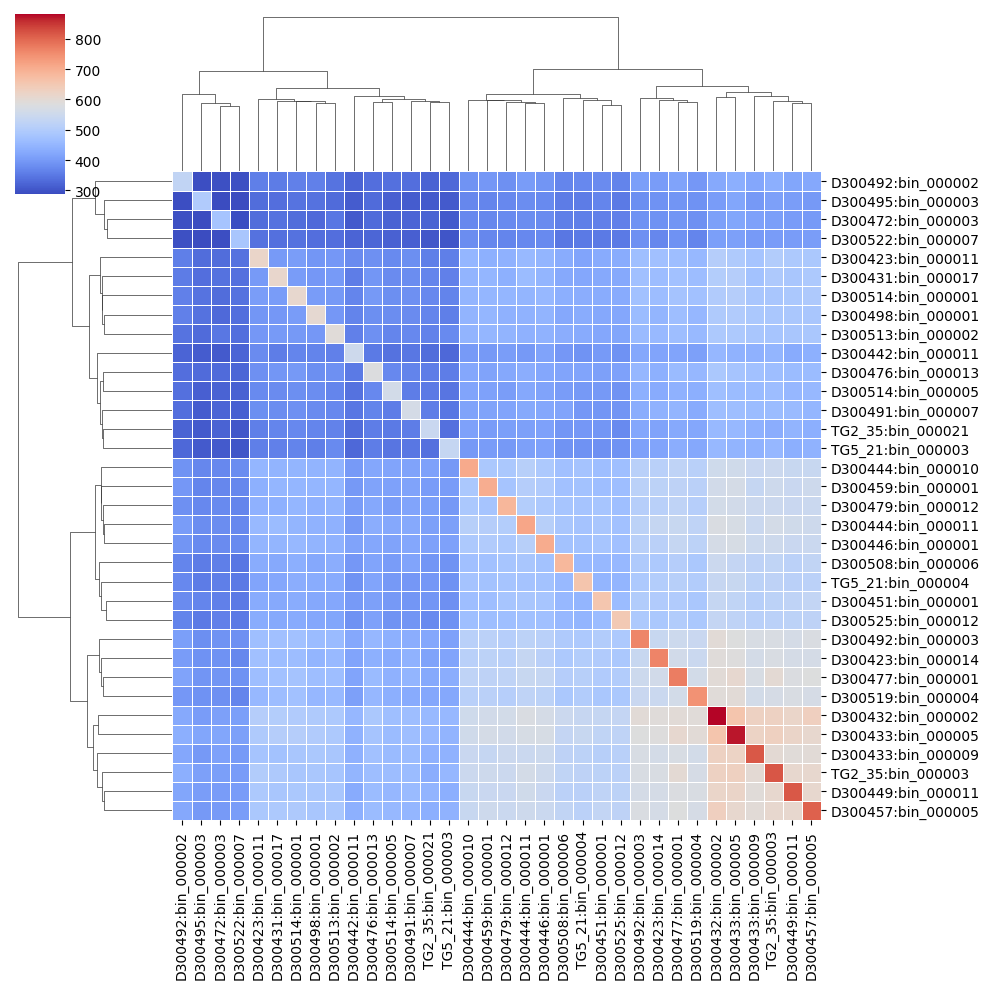

In [121]:
# Perform hierarchical clustering
insilico_heatmap_copy = insilico_heatmap.copy()
insilico_heatmap_copy.index = list(num_bac_genomes.loc[list(insilico_heatmap.index)]['genome'])
insilico_heatmap_copy.columns = list(num_bac_genomes.loc[list(insilico_heatmap.index)]['genome'])
linkage_matrix = hierarchy.linkage(insilico_heatmap_copy, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = insilico_heatmap_copy.iloc[:, order]

# Create a heatmap with a tree hierarchy
sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10))

plt.savefig(f"{experiment_folder}/ours_func_sim_34_bac_ORIG_TYPES.png", dpi=300)
plt.show()

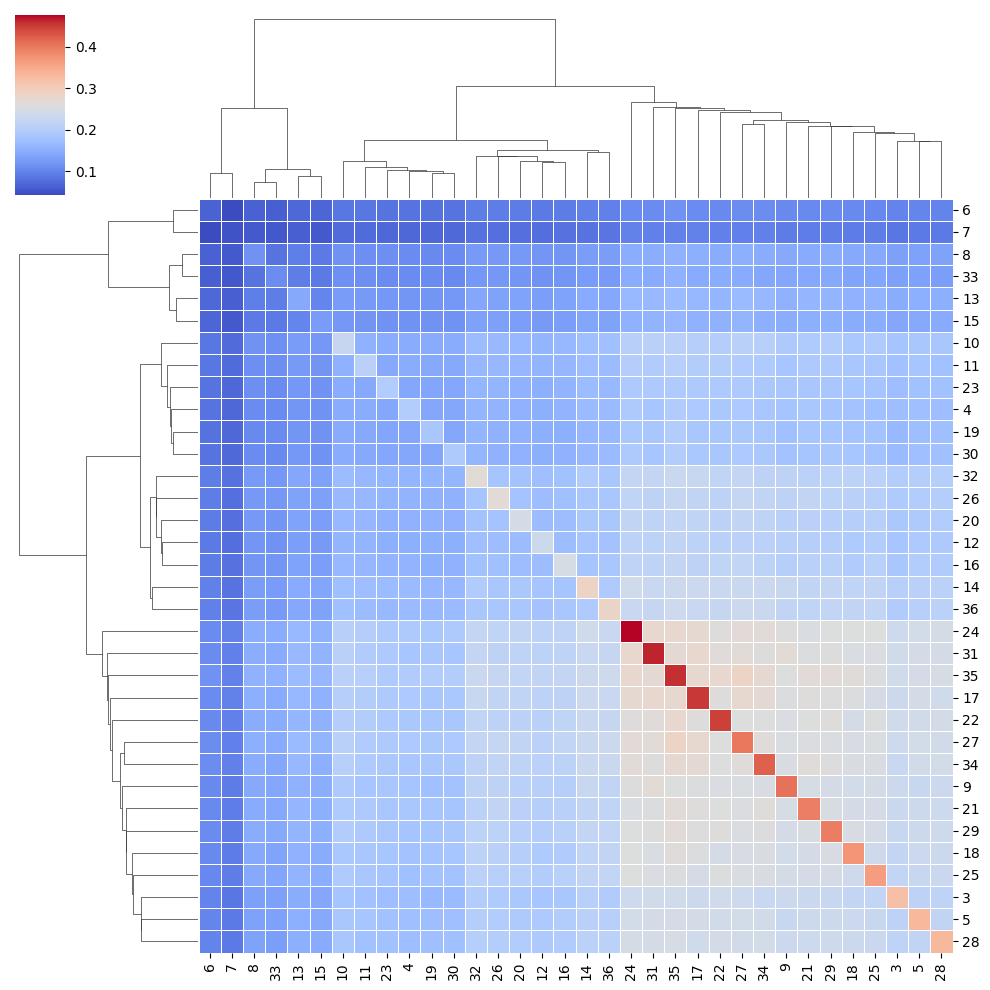

In [122]:
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(insilico_heatmap_normalized, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = insilico_heatmap_normalized.iloc[:, order]

# Create a heatmap with a tree hierarchy
clustermap = sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10))

plt.savefig(f"{experiment_folder}/ours_func_sim_34_bac_normalized_sqrt_LAMMP_TYPES.png", dpi=300)
plt.show()

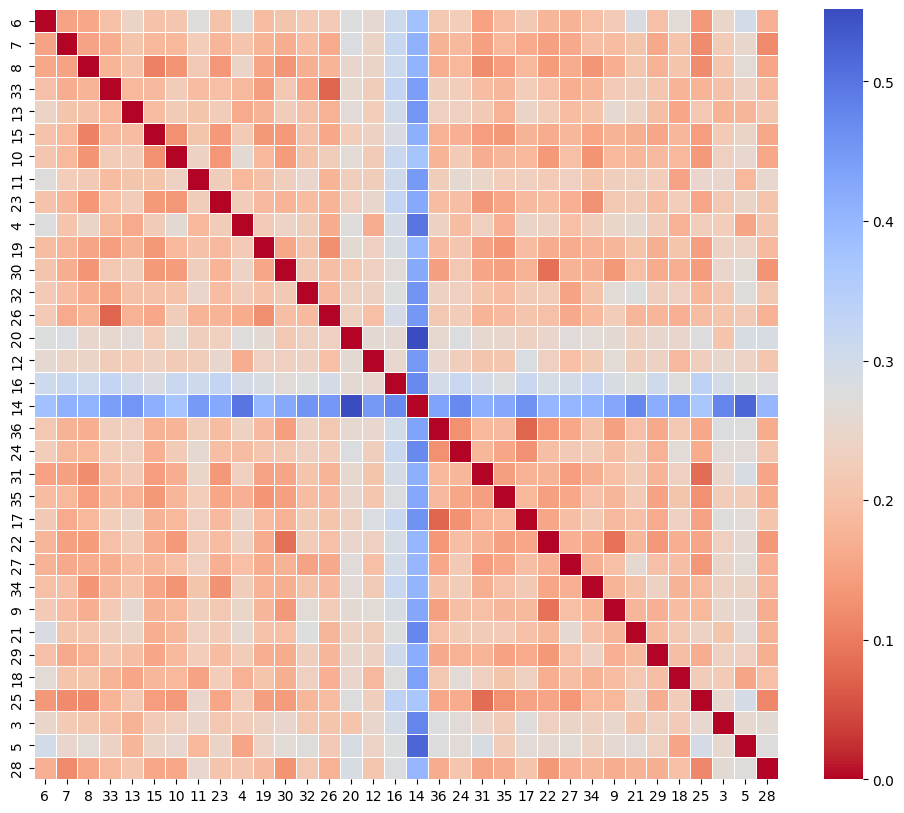

In [123]:
final_labels = clustermap.ax_heatmap.yaxis.get_majorticklabels()
final_labels = [int(x.get_text()) for x in final_labels]

df_reordered = genome_distance_matrix_renamed.reindex(columns=final_labels, index=final_labels)
#df_reordered = df_reordered.drop(14, axis=1)
#df_reordered = df_reordered.drop(14, axis=0)
#df_reordered = df_reordered.drop(16, axis=1)
#df_reordered = df_reordered.drop(16, axis=0)
#df_reordered = df_reordered.drop(20, axis=1)
#df_reordered = df_reordered.drop(20, axis=0)
# Create a heatmap with a tree hierarchy

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_reordered, cmap='coolwarm_r', linewidths=0.5, ax=ax)

plt.savefig(f"{experiment_folder}/antton_lammps_type_reordered.png", dpi=300)
plt.show()

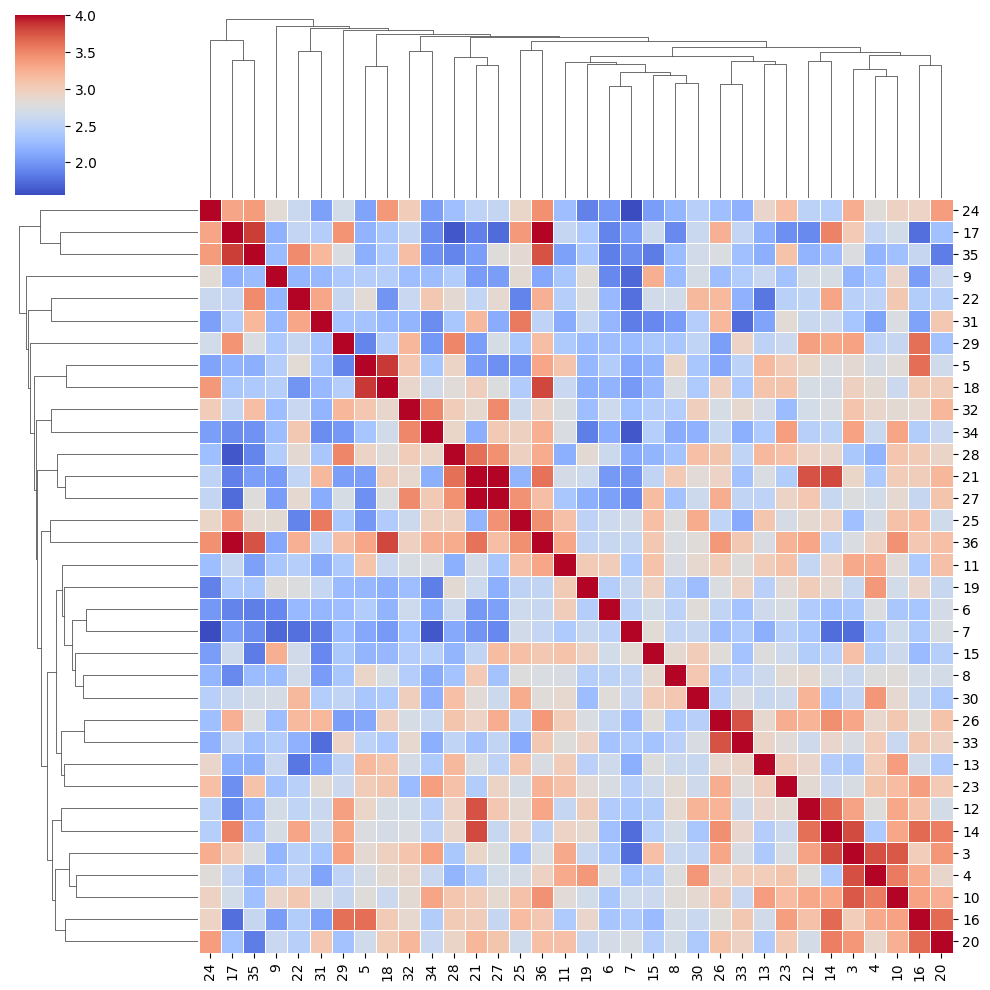

In [95]:
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(insilico_heatmap_logodds, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = insilico_heatmap_logodds.iloc[:, order]

# Create a heatmap with a tree hierarchy
clustermap = sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10), vmax=4)

plt.savefig(f"{experiment_folder}/ours_func_sim_34_bac_NEW_HEURRISTIC_LAMMP_TYPES.png", dpi=300)
plt.show()

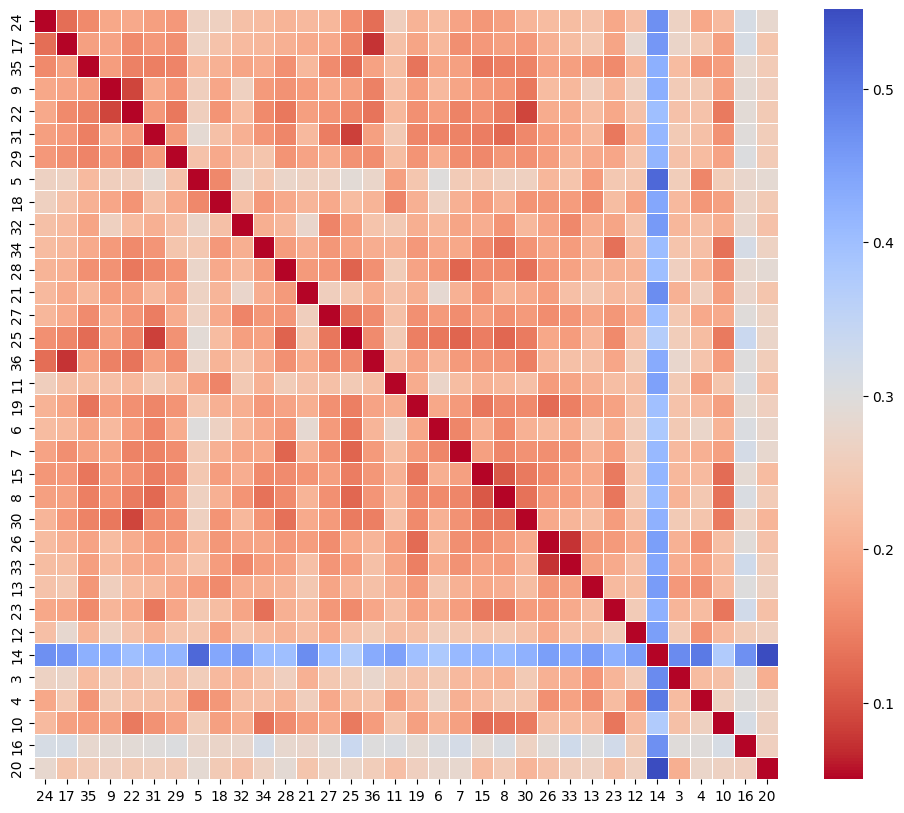

In [99]:
final_labels = clustermap.ax_heatmap.yaxis.get_majorticklabels()
final_labels = [int(x.get_text()) for x in final_labels]

df_reordered = genome_distance_matrix_renamed.reindex(columns=final_labels, index=final_labels)
#df_reordered = df_reordered.drop(14, axis=1)
#df_reordered = df_reordered.drop(14, axis=0)
#df_reordered = df_reordered.drop(16, axis=1)
#df_reordered = df_reordered.drop(16, axis=0)
#df_reordered = df_reordered.drop(20, axis=1)
#df_reordered = df_reordered.drop(20, axis=0)
# Create a heatmap with a tree hierarchy

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_reordered, cmap='coolwarm_r', linewidths=0.5, ax=ax, vmin=0.05)

plt.savefig(f"{experiment_folder}/antton_lammps_type_reordered_NEW_HEURISTIC.png", dpi=300)
plt.show()

In [104]:
df_reordered.shape

(31, 31)

In [111]:
df_reordered_numpy = df_reordered.to_numpy()

(array([ 2.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  3.,  2.,  4.,  7.,
         8., 11.,  8.,  7., 10., 19.,  8., 16., 20., 21., 23., 25., 15.,
        18., 18., 18., 16., 15., 14., 22., 19., 19., 17., 12.,  8., 10.,
         9.,  5.,  7., 11.,  1.,  6.,  2.,  1.,  2.,  1.,  1.]),
 array([0.07408949, 0.07855795, 0.08302642, 0.08749489, 0.09196336,
        0.09643182, 0.10090029, 0.10536876, 0.10983723, 0.11430569,
        0.11877416, 0.12324263, 0.1277111 , 0.13217956, 0.13664803,
        0.1411165 , 0.14558497, 0.15005343, 0.1545219 , 0.15899037,
        0.16345884, 0.1679273 , 0.17239577, 0.17686424, 0.1813327 ,
        0.18580117, 0.19026964, 0.19473811, 0.19920657, 0.20367504,
        0.20814351, 0.21261198, 0.21708044, 0.22154891, 0.22601738,
        0.23048585, 0.23495431, 0.23942278, 0.24389125, 0.24835972,
        0.25282818, 0.25729665, 0.26176512, 0.26623359, 0.27070205,
        0.27517052, 0.27963899, 0.28410746, 0.28857592, 0.29304439,
        0.29751286]),
 <BarContainer

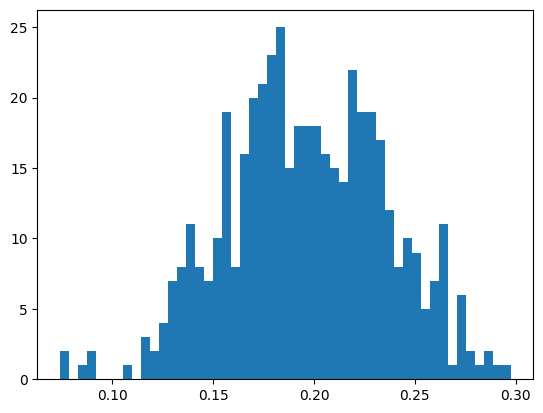

In [122]:
plt.hist(df_reordered_numpy[np.triu_indices(31, k=1)], bins=50)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  1.,  2.,  0.,  3.,  5.,  5.,  7.,  7., 11.,
         9.,  4.,  2.,  2.]),
 array([0.        , 0.0099171 , 0.01983419, 0.02975129, 0.03966838,
        0.04958548, 0.05950257, 0.06941967, 0.07933676, 0.08925386,
        0.09917095, 0.10908805, 0.11900514, 0.12892224, 0.13883933,
        0.14875643, 0.15867352, 0.16859062, 0.17850772, 0.18842481,
        0.19834191, 0.208259  , 0.2181761 , 0.22809319, 0.23801029,
        0.24792738, 0.25784448, 0.26776157, 0.27767867, 0.28759576,
        0.29751286]),
 <BarContainer object of 30 artists>)

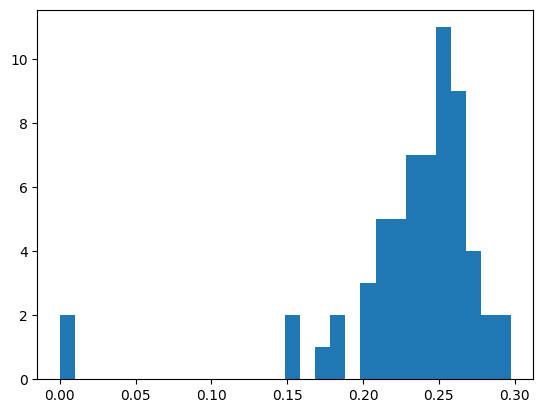

In [132]:
plt.hist(df_reordered.loc[[5,3],].to_numpy().flatten(), bins=30)

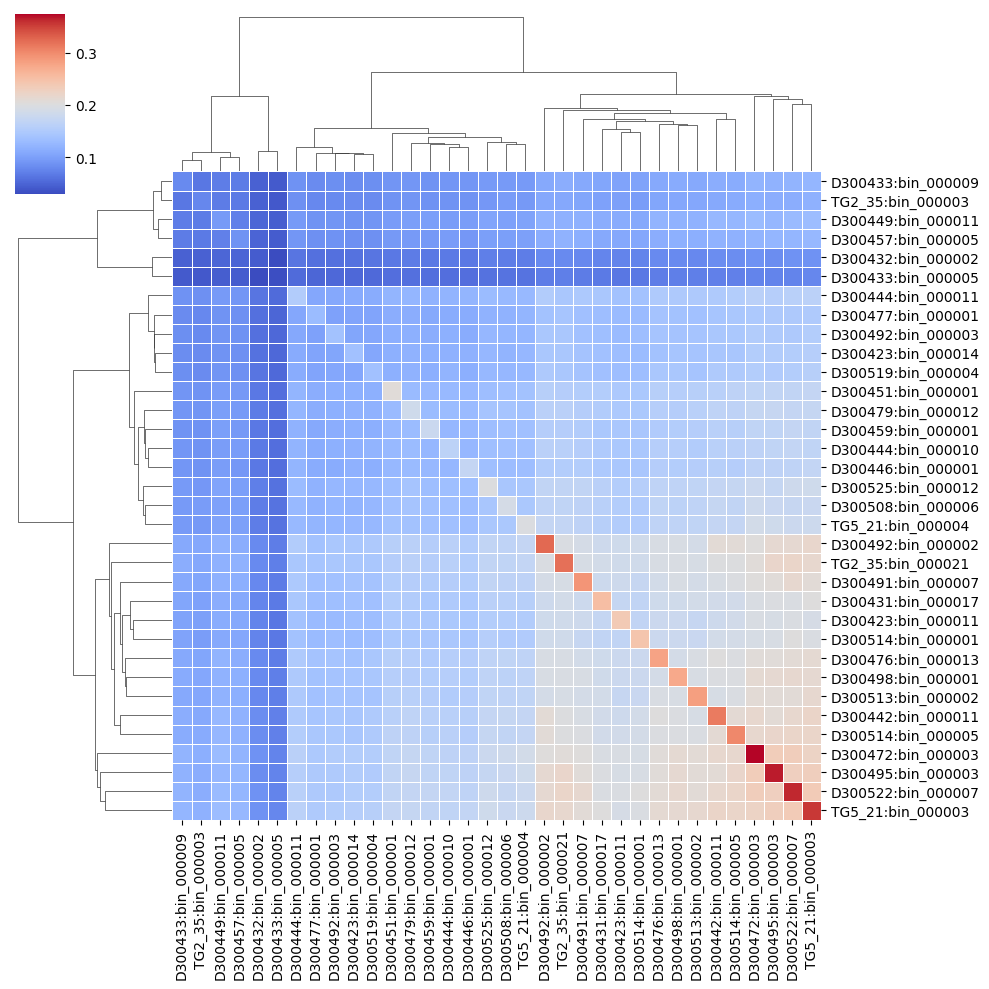

In [65]:
# Perform hierarchical clustering
insilico_heatmap_copy = insilico_heatmap_normalized.copy()
insilico_heatmap_copy.index = list(num_bac_genomes.loc[list(insilico_heatmap_normalized.index)]['genome'])
insilico_heatmap_copy.columns = list(num_bac_genomes.loc[list(insilico_heatmap_normalized.index)]['genome'])
linkage_matrix = hierarchy.linkage(insilico_heatmap_copy, method='average')

# Define the order of columns based on clustering
order = hierarchy.leaves_list(linkage_matrix)

# Reorder the DataFrame columns based on the clustering order
df_reordered = insilico_heatmap_copy.iloc[:, order]

# Create a heatmap with a tree hierarchy
sns.clustermap(df_reordered, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 10))

plt.savefig(f"{experiment_folder}/ours_func_sim_34_bac_normalized_sqrt_ORIG_TYPES.png", dpi=300)
plt.show()

Text(0.5, 1.0, 'Distribution of counts of bacterial genomes')

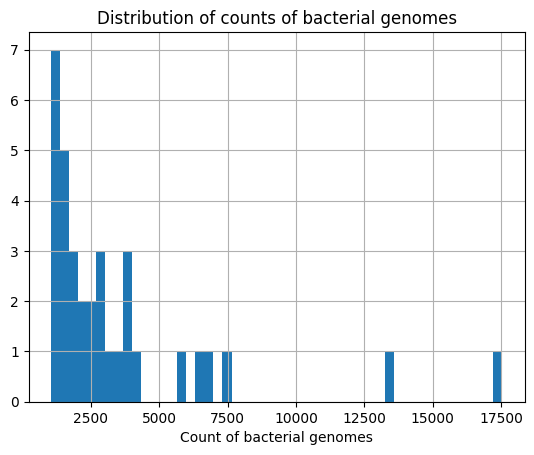

In [92]:
num_bac_genomes['count'].hist(bins=50)
plt.xlabel('Count of bacterial genomes')
plt.title('Distribution of counts of bacterial genomes')
#plt.savefig('counts_distr.png', dpi=300)

In [100]:
num_bac_genomes[(num_bac_genomes['count'] < 1500)]

,genome,count
9,D300442:bin_000011,1361
17,D300472:bin_000003,1062
21,D300491:bin_000007,1433
22,D300492:bin_000002,1187
24,D300495:bin_000003,1045
27,D300513:bin_000002,1481
29,D300514:bin_000005,1416
31,D300522:bin_000007,1048
34,TG2_35:bin_000021,1287
35,TG5_21:bin_000003,1175


In [67]:
clust_data = pd.read_csv(clust_files[0], sep='\t', header=None, names=["atom_id", "atom_type", "coords", "cluster"])

,atom_id,atom_type,coords,cluster
0,15746,3,1.80663 2.20928 32.8348,1241
1,19524,11,1.70623 2.25521 32.9113,1241
2,44827,36,0.529092 2.29404 33.9261,255
3,66284,34,0.403448 2.31042 33.9676,255
4,95641,20,0.391498 2.19006 33.9229,255
...,...,...,...,...
119242,98887,11,39.9788 39.1942 43.1972,716
119243,17846,32,39.8373 39.2718 43.0438,716
119244,23701,8,39.9022 39.3876 43.0329,716
119245,88317,8,39.7808 39.1144 42.9058,716


In [53]:
from glob import glob

threshold_clus = 0.18

In [51]:
list_of_step_files = sorted(glob(f"{experiment_folder}/parsed_data/*.txt"))[1:]

In [52]:
adj_list_of_step_files = []
list_of_steps = []
for file_ in list_of_step_files:
    with open(file_, 'r') as f:
        id_line = f.readline()
    if int(id_line.strip('\n')) % 50000 == 0:
        adj_list_of_step_files.append(file_)
        list_of_steps.append(int(id_line.strip('\n')))

In [54]:
steps_df_dict = {key: None for key in list_of_steps}
with open(adj_list_of_step_files[0], 'r') as f:
    step_file = f.readlines()
    adj_step_file = [x.strip(' \n').split(' ') for x in step_file[8:]]
    step_df = pd.DataFrame(adj_step_file, columns=["ID", "Bac_1", "Bac_2", "Distance", "Energy", "Temp"])

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f103f8d9ea0>>
Traceback (most recent call last):
  File "/home/encent/.conda/envs/lammps/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f103f8d9ea0>>
Traceback (most recent call last):
  File "/home/encent/.conda/envs/lammps/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f103f8d9ea0>>
Traceback (most recent call last):
  File "/home/encent/.conda/envs/lammps/lib/python3.10/site-packages/ipykernel/ipkernel

KeyboardInterrupt: 

In [ ]:
step_df

In [49]:
step_file

['0\n',
 'ITEM: NUMBER OF ENTRIES\n',
 '70938114\n',
 'ITEM: BOX BOUNDS pp pp ff\n',
 '0.0000000000000000e+00 4.0000000000000000e+01\n',
 '0.0000000000000000e+00 4.0000000000000000e+01\n',
 '-1.0000000000000000e+00 4.6000000000000000e+01\n',
 'ITEM: ENTRIES index c_pairs[1] c_pairs[2] c_interactions[1] c_interactions[2] c_interactions[3]\n',
 '1 3260 4488 0.91972 -4.65556e-11 -3.04469e-10 \n',
 '2 3260 5178 0.776088 -1.16131e-10 -8.98612e-10 \n',
 '3 3260 6090 1.03186 -2.32224e-11 -1.35703e-10 \n',
 '4 3260 6999 1.20954 -9.91476e-12 -4.98216e-11 \n',
 '5 3260 7088 0.340403 -2.01755e-08 -3.54935e-07 \n',
 '6 3260 10032 1.22618 -8.00982e-12 -3.97473e-11 \n',
 '7 3260 10789 1.30298 -5.76113e-12 -2.70717e-11 \n',
 '8 3260 11214 0.891904 -3.19584e-10 -2.15433e-09 \n',
 '9 3260 12050 0.984244 -2.52233e-11 -1.54336e-10 \n',
 '10 3260 12484 0.650579 -4.14636e-10 -3.82504e-09 \n',
 '11 3260 13739 1.49303 -2.47939e-12 -1.04374e-11 \n',
 '12 3260 13868 0.927095 -4.72082e-11 -3.06319e-10 \n',
 '13

In [43]:
adj_list_of_step_files

['/mnt/scratch/nikolai/3Domics/WALL_HARMONIC_0.5/parsed_data/pairwise_block_002.txt',
 '/mnt/scratch/nikolai/3Domics/WALL_HARMONIC_0.5/parsed_data/pairwise_block_003.txt']

In [39]:
with open(list_of_step_files[0], 'r') as f:
    data_step_0 = f.readline()

In [40]:
data_step_0

'0\n'